# Chicago taxi data 

## Clustering Algorithm
DBSCAN is appied in this anlysis because we do not to pre-define the number of clusters. Generally, the taxi picking up location is really random, and it is interesting to know if there are any obvious groups among the dataset. 

## Pre-processing
The dataset represents each taxi-trip informatino which includes taxi's id, trip's distance, time, locatino, etc. To evaluate the clustering algorithms, only the the columns of coordinates are needed. Therefore, the pre-processing extracted two columns: ***Pickup Centroid Latitude*** and ***Pickup Centroid Longitude***. Also, we don't need any NA data so the rows containing N/A will be dropped.


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

df = pd.read_csv('chicago_taxi.csv')
pickup_coordinates_df = df[['Pickup Centroid Latitude', 'Pickup Centroid Longitude']].dropna()

In [3]:
# Total rows
len(pickup_coordinates_df)

273071

## Sampling
This dataframe has 273071 rows, which quietly slows down processing. To speed up the process, I decided to take 30000 rows only. To be fair, I used the [sampling method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) from the Pandas.

In [4]:
# sampling data
sampled_df = pickup_coordinates_df.sample(30000)

## Normalization
Although the coordinates are presented in human-read format, I still want to normalize the latitude and longitude to give us a nicer perspective evaluating the result.

## DBSCAN
The first algorithm is DBSCAN, it needs two parameters: eps and min_sample. The *eps* is the radius for each data point when doing the clustering. And the min_sample is how many data points are at least counted into a group. 

In [11]:
X = sampled_df.to_numpy()
X = StandardScaler().fit_transform(X)
dbscan_clustering = DBSCAN(eps=0.4, min_samples=50).fit(X)

In [12]:
# How many groups in the clustering
np.unique(dbscan_clustering.labels_)

array([-1,  0,  1,  2,  3,  4,  5])

### Grouping label

The cell above shows the DBSCAN divided the sampled dataset into 7 groups. The groups label marked as -1 means outliers, and the other 6 are the groups that containing at least 50 points. 

### Expectation
My expectation was that almost each data points would be in a group.  
But as the following figure shows, the purple points are all outliers, which is not what I actually want. 

### Evaluation
I have tested many different eps and min_samples. When setting eps to below 0.4, there will be too many groups(about 20). It is quite difficult to get the best match between eps and min_samples. 

### Conclusion
Although DBSCAN creates a lot of outliers, it well grouped close points into a cluster. Overall, it is good to know how DBSCAN actually works and having a good match of eps and sample is a hard work. 


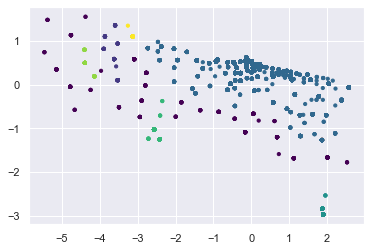

In [13]:
plt.scatter(X[:,0], X[:,1], c=dbscan_clustering.labels_, cmap='viridis', s=10)